In [161]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%reload_ext autoreload
%autoreload 2
sys.path.append('./scripts')
import tools

# Example of one water molecule optimization

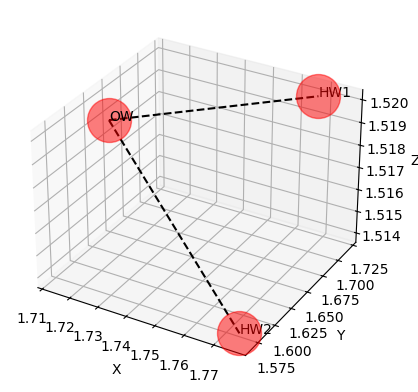

In [180]:
filename = "data/one_water.txt"
coordinates = tools.read_coordinates(filename)
tools.plot_molecule(coordinates)

## Force fields for a simple system of one water molecule

> $ V_{\text{pot}} = V_{\text{bonds}} + V_{\text{angles}} $  


> $ V_{\text{pot}} = \sum_{liasons} \frac{k}{2} (l - l_0)^2 + \sum_{angles} \frac{k_{\theta}}{2} (\theta - \theta_0)^2 $  

   
  - $ k $ est la constante de force de la liaison,
  - $ l $ est la longueur actuelle de la liaison,
  - $ l_0 $ est la longueur d'équilibre de la liaison,

  - $ k_{\theta} $ est la constante de force de l'angle,
  - $ \theta $ est l'angle actuel,
  - $ \theta_0 $ est l'angle d'équilibre.

In [181]:
# We used TIP3P water model parameters during the TD/TP
k_bond = 450  # kcal//mol^(-1)/A^(-2) 
l_0 = 0.9572  # A
k_angle = 55  # kcal/mol^(-1)/rad^(-2) 
theta_0 = 104.52 * np.pi / 180 # rad

In [210]:
total_energy = tools.compute_total_energy(coordinates, k_bond, l_0, k_angle, theta_0, verbose="Initial")
new_coords, new_energy = tools.minimize_energy(coordinates, k_bond, l_0, k_angle, theta_0)

Initial energy: 333.75 kcal/mol.
Initial l_OH_1: 0.0954, 0.0966 Angstrom.
Initial theta_1: 104.03 degrees.
Converged in 132 steps.


# Example of three water molecules optimization

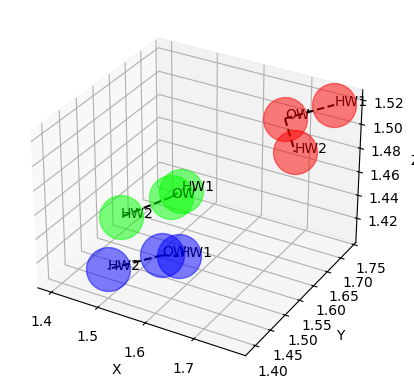

In [157]:
filename = "data/three_waters.txt"
coordinates = tools.read_coordinates(filename)
tools.plot_molecule(coordinates)

## Force fields for a system of three water molecules

> $ V_{\text{pot}} = V_{\text{bonds}} + V_{\text{angles}} + V_{\text{torsion}} + V_{\text{van der Waals}} + V_{\text{electrostatic}} $  


> $ V_{\text{pot}} = \sum_{liasons} \frac{k}{2} (l - l_0)^2 + $  
>
> $ + \sum_{angles} \frac{k_{\theta}}{2} (\theta - \theta_0)^2 + $   
>
>$ + \sum_{i=1}^N \sum_{j=1}^N  4\epsilon_{ij}\left[\left(\frac{\sigma_{ij}}{r_{ij}}\right)^{12} - \left(\frac{\sigma_{ij}}{r_{ij}}\right)^6\right] + $  
>
>$ + \sum_{i=1}^N \sum_{j=1}^N \frac{q_i q_j}{4\pi\epsilon_0 r_{ij}} $
   
  - $ k $ est la constante de force de la liaison,
  - $ l $ est la longueur actuelle de la liaison,
  - $ l_0 $ est la longueur d'équilibre de la liaison,

  - $ k_{\theta} $ est la constante de force de l'angle,
  - $ \theta $ est l'angle actuel,
  - $ \theta_0 $ est l'angle d'équilibre,

  - $ \epsilon_{ij} $ est la profondeur de potentiel,
  - $ \sigma_{ij} $ est la distance à laquelle l'énergie potentielle est nulle,
  - $ r_{ij} $ est la distance entre les atomes $ i $ et $ j $.

  - $ q_i $ et $ q_j $ sont les charges partielles des atomes $ i $ et $ j $,
  - $ r_{ij} $ est la distance entre les atomes $ i $ et $ j $,
  - $ \epsilon_0 $ est la permittivité du vide.

In [158]:
epsilons = {"HH": 0.0460, "OH": 0.0836, "OO": 0.1521} # kcal/mol^(-1)
sigmas = {"HH": 0.4490, "OH": 1.9927, "OO": 3.5364}   # A
charges = {"H": 0.4170,"O": -0.8340} # e

Initial energy: 1002.61 kcal/mol.
Initial l_OH_1: 0.0954, 0.0966 Angstrom.
Initial theta_1: 104.03 degrees.
Initial l_OH_2: 0.0954, 0.0966 Angstrom.
Initial theta_2: 105.01 degrees.
Initial l_OH_3: 0.0954, 0.0966 Angstrom.
Initial theta_3: 104.87 degrees.
Converged in 132 steps.
Energy after minimization: 6.220435904335795e-22 kcal/mol


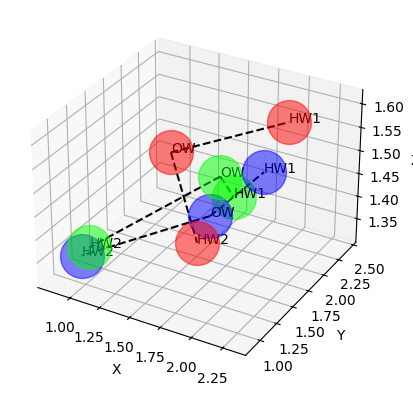

In [160]:
total_energy = tools.compute_total_energy(coordinates, k_bond, l_0, k_angle, theta_0, verbose="Initial")

new_coords, new_energy = tools.minimize_energy(coordinates, k_bond, l_0, k_angle, theta_0)
print(f"Energy after minimization: {new_energy} kcal/mol")
tools.plot_molecule(new_coords)